# 

In [43]:
import pandas as pd
phishing_dataset = pd.read_csv('Phishing_Legitimate_full.csv')

In [44]:
x_phishing = phishing_dataset.iloc[:,1:49]
x_phishing

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,1,-1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,0,1,1,-1,1,0,1
9996,2,1,4,59,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
9998,3,1,1,49,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1


In [45]:
y_phishing = phishing_dataset.iloc[:, 49:50]
y_phishing

,CLASS_LABEL
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_phishing, y_phishing, test_size=0.2, random_state=69)

In [47]:
headers = pd.read_csv('Phishing_Legitimate_full.csv', index_col=0, nrows=1).columns.tolist()
headers.pop()
headers

['NumDots',
 'SubdomainLevel',
 'PathLevel',
 'UrlLength',
 'NumDash',
 'NumDashInHostname',
 'AtSymbol',
 'TildeSymbol',
 'NumUnderscore',
 'NumPercent',
 'NumQueryComponents',
 'NumAmpersand',
 'NumHash',
 'NumNumericChars',
 'NoHttps',
 'RandomString',
 'IpAddress',
 'DomainInSubdomains',
 'DomainInPaths',
 'HttpsInHostname',
 'HostnameLength',
 'PathLength',
 'QueryLength',
 'DoubleSlashInPath',
 'NumSensitiveWords',
 'EmbeddedBrandName',
 'PctExtHyperlinks',
 'PctExtResourceUrls',
 'ExtFavicon',
 'InsecureForms',
 'RelativeFormAction',
 'ExtFormAction',
 'AbnormalFormAction',
 'PctNullSelfRedirectHyperlinks',
 'FrequentDomainNameMismatch',
 'FakeLinkInStatusBar',
 'RightClickDisabled',
 'PopUpWindow',
 'SubmitInfoToEmail',
 'IframeOrFrame',
 'MissingTitle',
 'ImagesOnlyInForm',
 'SubdomainLevelRT',
 'UrlLengthRT',
 'PctExtResourceUrlsRT',
 'AbnormalExtFormActionR',
 'ExtMetaScriptLinkRT',
 'PctExtNullSelfRedirectHyperlinksRT']

In [48]:
accuracies_by_depth = [-1 for i in range(0, 51)]
precisions_by_depth = [-1 for i in range(0, 51)]
recalls_by_depth = [-1 for i in range(0, 51)]
f1s_by_depth = [-1 for i in range(0, 51)]

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
for i in range(2, 51):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42, criterion="entropy")
    tree_clf.fit(X_train, y_train)

    y_phishing_pred = cross_val_predict(tree_clf, X_test, y_test, cv = 3)


    filename = "phishing_tree_depth_test_val"+str(i)+".dot"
    export_graphviz(
        tree_clf,
        out_file=filename,
        feature_names=headers,
        class_names=['1', '0'],
        rounded=True,
        filled=True
    )
    
    Source.from_file(filename)
    
    accuracies_by_depth[i] = metrics.accuracy_score(y_test, y_phishing_pred)
    precisions_by_depth[i] = metrics.precision_score(y_test, y_phishing_pred, average = "macro")
    recalls_by_depth[i] = metrics.recall_score (y_test, y_phishing_pred, average = "macro")
    f1s_by_depth[i] = metrics.f1_score (y_test, y_phishing_pred, average = "macro")

    print(f"Accuracy at depth={i}: {accuracies_by_depth[i]}")
    print(f"Precision at depth={i}: {precisions_by_depth[i]}")
    print(f"Recall at depth={i}: {recalls_by_depth[i]}")
    print(f"F1 at depth={i}: {f1s_by_depth[i]}\n")


Accuracy at depth=2: 0.9145
Precision at depth=2: 0.9155059525002104
Recall at depth=2: 0.914843108485334
F1 at depth=2: 0.9144820198446724

Accuracy at depth=3: 0.944
Precision at depth=3: 0.9440944716522038
Recall at depth=3: 0.9441335585713986
F1 at depth=3: 0.943999775999104

Accuracy at depth=4: 0.942
Precision at depth=4: 0.9423835208825468
Recall at depth=4: 0.9422242358958663
F1 at depth=4: 0.9419985499637491

Accuracy at depth=5: 0.948
Precision at depth=5: 0.9479845318607867
Recall at depth=5: 0.9480562215014336
F1 at depth=5: 0.9479966717869943

Accuracy at depth=6: 0.9465
Precision at depth=6: 0.9465147860591442
Recall at depth=6: 0.9465884734520134
F1 at depth=6: 0.9464983815760426

Accuracy at depth=7: 0.948
Precision at depth=7: 0.9480235322117899
Recall at depth=7: 0.9480952280935478
F1 at depth=7: 0.9479986999674992

Accuracy at depth=8: 0.9485
Precision at depth=8: 0.9484798479847985
Recall at depth=8: 0.9485107983249169
F1 at depth=8: 0.9484931882241425

Accuracy at 

In [67]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
print(accuracies_by_depth[2])

0.9145


In [62]:
def createDepthPlot(title, xlabel, ylabel, data):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_ticks(np.arange(.80, 1, 0.005))
    
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.xaxis.set_ticks(np.arange(0, 55, 5))
    
    max_val = data[0]
    idx = 0
    for i in range(len(data)):
        if data[i] > max_val:
            max_val = data[i]
            idx = i

    plt.scatter(idx, max_val, color="red")
    plt.text(idx + 1, max_val - 0.002, f'x={idx}\ny={max_val}', fontsize = 10)
    ax.plot([i for i in range(2, 51)], data[2:])
    
    plt.savefig(f'{xlabel}vs{ylabel}.png')

In [52]:
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.model_selection import cross_val_score

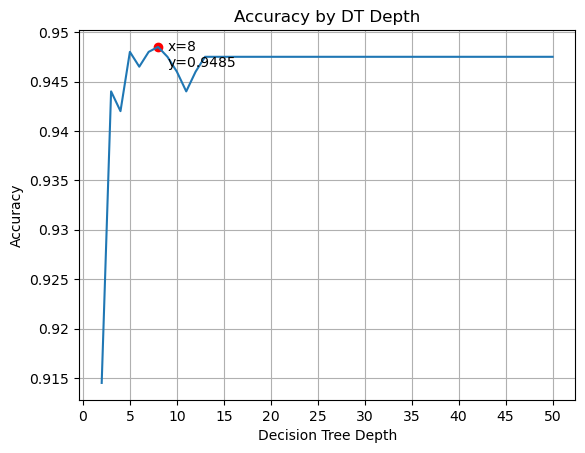

In [63]:
createDepthPlot("Accuracy by DT Depth", "Decision Tree Depth", "Accuracy", accuracies_by_depth)

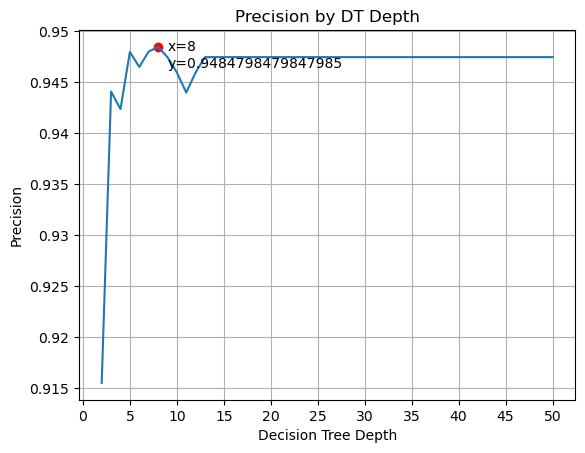

In [64]:
createDepthPlot("Precision by DT Depth", "Decision Tree Depth", "Precision", precisions_by_depth)

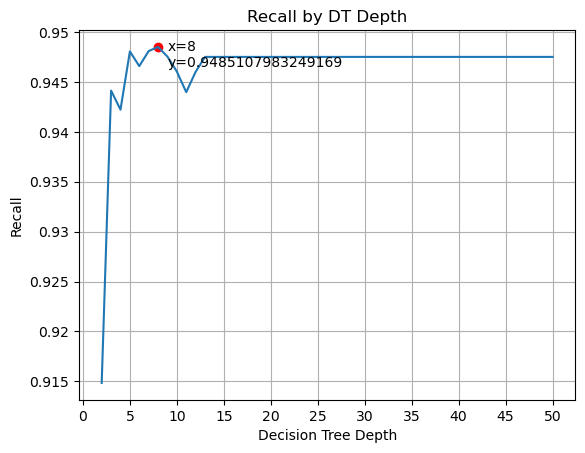

In [65]:
createDepthPlot("Recall by DT Depth", "Decision Tree Depth", "Recall", recalls_by_depth)

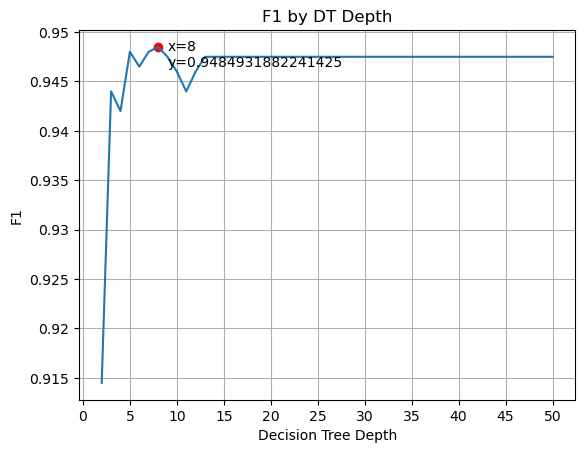

In [66]:
createDepthPlot("F1 by DT Depth", "Decision Tree Depth", "F1", f1s_by_depth)

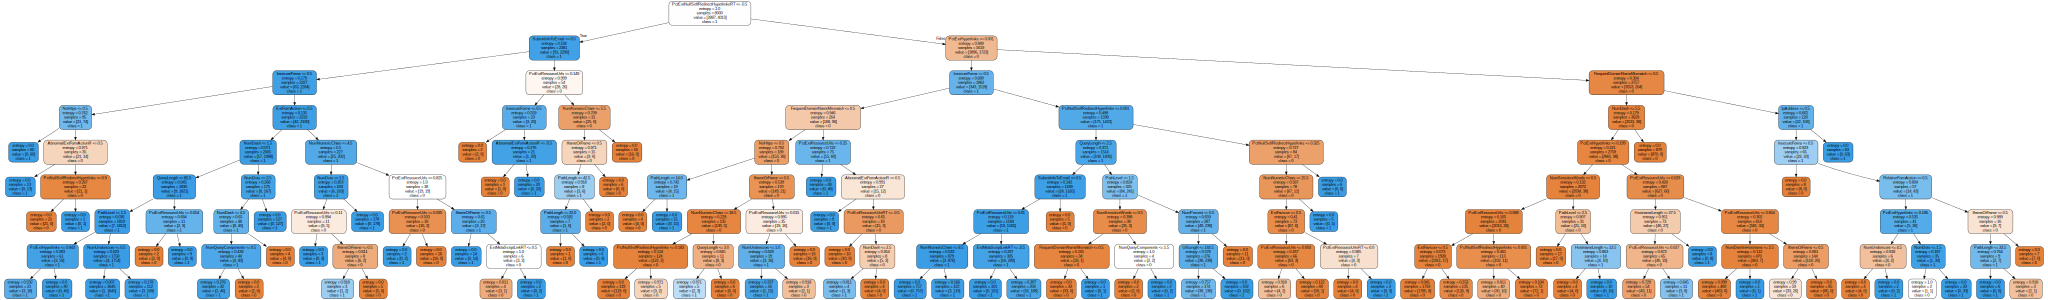

In [57]:
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42, criterion="entropy")
tree_clf.fit(X_train, y_train)

y_phishing_pred = cross_val_predict(tree_clf, X_test, y_test, cv=3)


filename = "phishing_tree_depth_test_val_best_case.dot"
export_graphviz(
    tree_clf,
    out_file=filename,
    feature_names=headers,
    class_names=['0', '1'],
    rounded=True,
    filled=True
)
    
Source.from_file(filename)

In [58]:
import pydot

(graph,) = pydot.graph_from_dot_file(filename)
graph.write_png('phishing_tree_depth_test_val_best_case.png')

      CLASS_LABEL
5256            0
7272            0
1323            1
4924            1
5845            0
...           ...
9260            0
8020            0
6337            0
5638            0
721             1

[2000 rows x 1 columns]


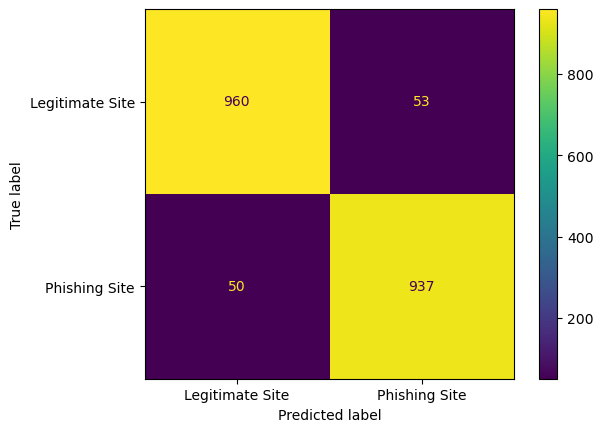

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_phishing_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Legitimate Site", "Phishing Site"])

cm_display.plot()
print(y_test)